In [1]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
data = pd.read_csv("target.csv")

In [3]:
data[:2]

,customer_id,card_tenure,risk_score,num_promoted,avg_bal,geo_group,res_type,Unnamed: 7
0,SB0000057824,198.0,755,0,3818.0,E,NaN,NaN
1,SB0000030501,206.0,647,0,3357.0,SE,CN,NaN


In [4]:
data=data.drop(['Unnamed: 7'], axis=1)
data=data.drop(['customer_id'], axis=1)

In [5]:
data = data.dropna(how='any')

In [6]:
data['res_type']= data['res_type'].map({'CN':0, 'CO': 1, 'RE': 2, 'TO': 3,'SI': 4}).astype(int) 

In [7]:
data=pd.get_dummies(data=data,columns=['geo_group'])

In [8]:
data[:2]

,card_tenure,risk_score,num_promoted,avg_bal,res_type,geo_group_E,geo_group_N,geo_group_SE,geo_group_W
1,206.0,647,0,3357.0,0,0.0,0.0,1.0,0.0
2,107.0,629,0,3728.0,0,0.0,1.0,0.0,0.0


In [9]:
X = data.drop(['res_type'], axis=1).values.astype('float64')

In [10]:
Y = data['res_type'].values.astype('int64')

In [11]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

78804

In [12]:
from keras.utils import np_utils
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

Using TensorFlow backend.


In [13]:
train_Features.shape

(78804, 8)

In [14]:
train_Label.shape

(78804, 5)

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [16]:
model = Sequential()

In [17]:
model.add(Dense(units=16*6,   input_dim=8,
                kernel_initializer='uniform', 
                activation='relu'))

In [18]:
model.add(Dense(units=16*5, 
                kernel_initializer='uniform', 
                activation='relu'))

In [19]:
model.add(Dense(units=16*4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [20]:
model.add(Dense(units=16*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [21]:
model.add(Dense(units=16*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [22]:
model.add(Dense(units=16, 
                kernel_initializer='uniform', 
                activation='relu'))

In [23]:
model.add(Dense(units=5, 
                kernel_initializer='uniform',
                activation='softmax'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 96)                864       
_________________________________________________________________
dense_2 (Dense)              (None, 80)                7760      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                5184      
_________________________________________________________________
dense_4 (Dense)              (None, 48)                3120      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1568      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 85        
Total para

In [25]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [26]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=800,verbose=1,callbacks=[early_stopping])

Train on 70923 samples, validate on 7881 samples
Epoch 1/30
70923/70923 [==============================] - 2s 23us/step - loss: 1.4334 - acc: 0.3789 - val_loss: 1.0538 - val_acc: 0.2643
Epoch 2/30
70923/70923 [==============================] - 1s 15us/step - loss: 0.9273 - acc: 0.5548 - val_loss: 0.7546 - val_acc: 0.5994
Epoch 3/30
70923/70923 [==============================] - 1s 15us/step - loss: 0.7069 - acc: 0.6437 - val_loss: 0.6475 - val_acc: 0.6396
Epoch 4/30
70923/70923 [==============================] - 1s 14us/step - loss: 0.2866 - acc: 0.8842 - val_loss: 0.0755 - val_acc: 0.9713
Epoch 5/30
70923/70923 [==============================] - 1s 14us/step - loss: 0.0626 - acc: 0.9767 - val_loss: 0.0499 - val_acc: 0.9824
Epoch 6/30
70923/70923 [==============================] - 1s 14us/step - loss: 0.0436 - acc: 0.9847 - val_loss: 0.0369 - val_acc: 0.9878
Epoch 7/30
70923/70923 [==============================] - 1s 14us/step - loss: 0.0393 - acc: 0.9852 - val_loss: 0.0440 - val_acc:

In [27]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

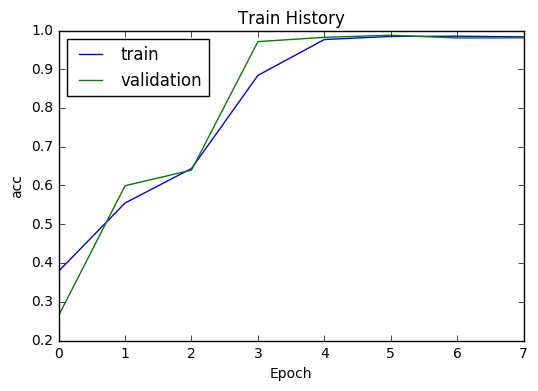

In [28]:
show_train_history(train_history,'acc','val_acc')

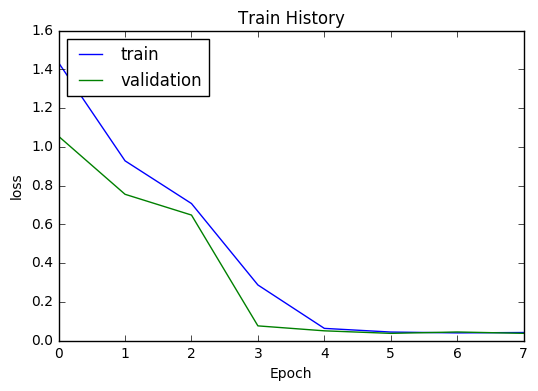

In [29]:
show_train_history(train_history,'loss','val_loss')

In [30]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

19702/19702 [==============================] - 1s 28us/step


In [31]:
scores[1]

0.9835549690386762